<img src='./assets/pi2_technical_header.png'>

Dado que la selección de un portafolio con los componentes del índice S&P500 no resultó tan adecuada. La alternativa propuest es invertir diretamente en el ETF del índice (SPX) y en las acciones de Standar & Poors Global (SPGI): 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import mplfinance as mpf
#from mpl_finance import candlestick_ohlc

Hacemos el análisis del indicador S&P500

In [4]:
#lee el dataframe
spx_data = pd.read_csv('./data/spx_data.csv', index_col='Date', parse_dates=True)

Vamos a graficar el historial del precio del indicador

In [5]:
#vamos a sacar el promedio del precio para incluirlo en la grafica de precio.. o en las posteriores
spx_data['promedio'] = (spx_data['High'] + spx_data['Low']) / 2 

In [6]:
spx_data

,Open,High,Low,Close,Adj Close,Volume,promedio
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1458.179993
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1426.325012
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1395.475037
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1402.000000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1421.099976
...,...,...,...,...,...,...,...
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000,4064.729980
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000,4023.770020
2023-02-22 00:00:00,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000,3997.135010


<Figure size 1080x720 with 0 Axes>

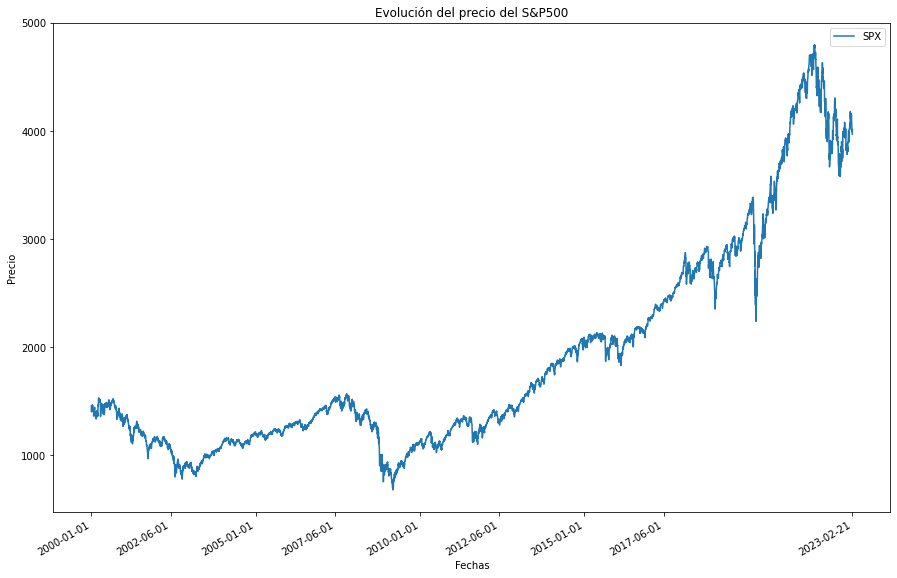

In [5]:
lstFechas =['2000-01-01','2002-06-01','2005-01-01','2007-06-01','2010-01-01','2012-06-01','2015-01-01','2017-06-01','2023-02-21']
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(spx_data.index, spx_data['Adj Close'],label='SPX')
ax.set_title('Evolución del precio del S&P500')
ax.set_xlabel('Fechas')
ax.set_ylabel('Precio')
ax.set_xticks(lstFechas)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

A continuación, vamos a mostrar el gráfico de tendencia del índice

<Figure size 1500x1000 with 0 Axes>

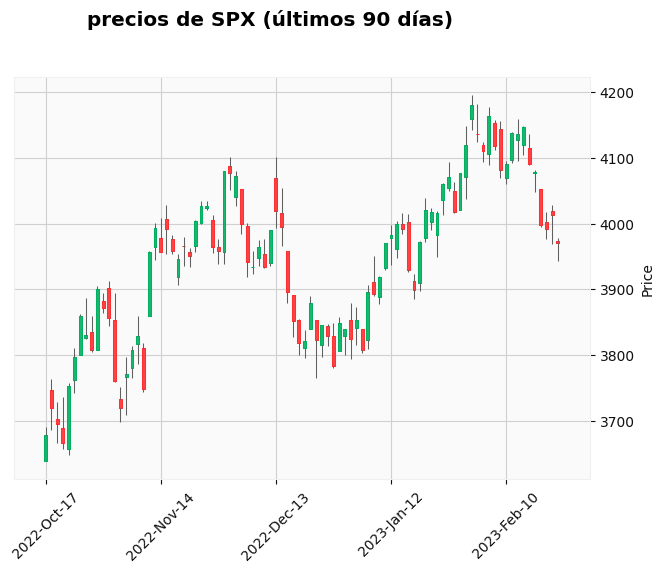

In [7]:
spx_data_60 = spx_data.tail(90)

#CREAMOS GRÁFICA DE VELAS
plt.figure(figsize=(15,10))
mpf.plot(spx_data_60, type='candle', title='precios de SPX (últimos 90 días)', style='yahoo')


Calculamos la media móvil. SMA (Simple Moving Average), que toma un promedio entre un número de periodos. tomaremos la media móvil a 7 días 

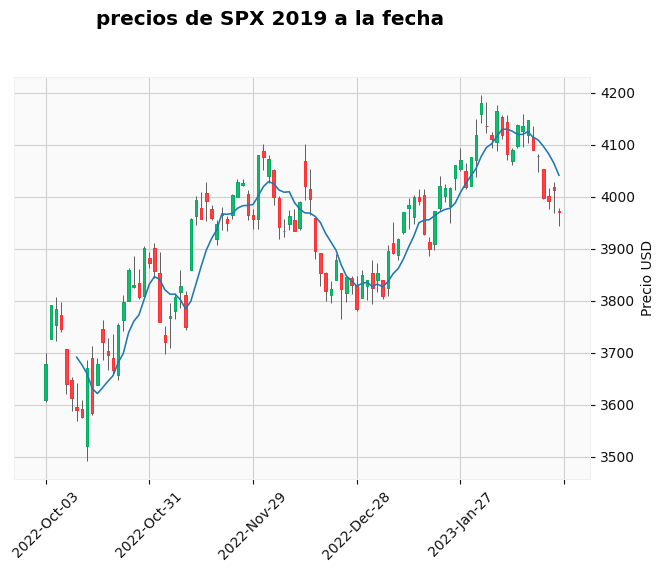

In [14]:
#crea el gráfico de 
data_velas = spx_data[(spx_data.index > '2019-01-01')]

mpf.plot(data_velas.tail(100), type='candle', title='precios de SPX 2019 a la fecha', ylabel='Precio USD', style='yahoo', mav=7)


vamos a agregar el volumen operado en el periodo

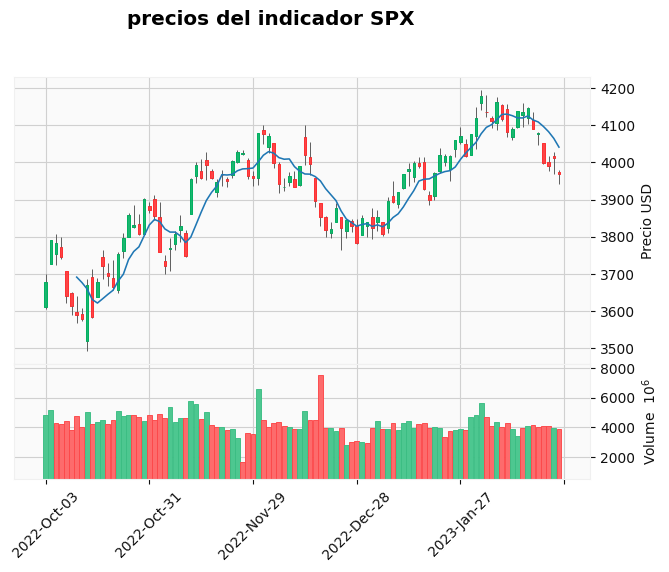

In [15]:
mpf.plot(data_velas.tail(100), type='candle', title='precios del indicador SPX', ylabel='Precio USD', style='yahoo', mav=7, volume=True)

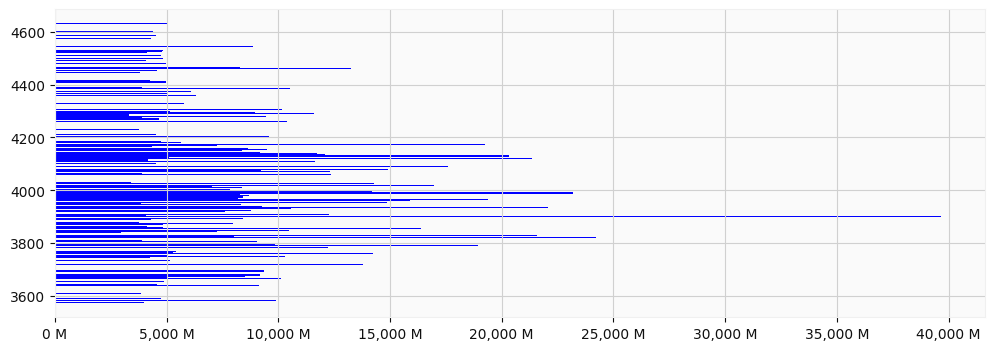

In [16]:
#GRaficamos el volumen operado
from matplotlib.ticker import FuncFormatter

data_vp = data_velas[['Adj Close', 'Volume']].tail(252).copy()
data_vp['Adj Close'] = data_vp['Adj Close'].apply(lambda x: int(5 * round(float(x)/5)))
data_vp = data_vp.set_index('Adj Close')
data_vp = data_vp.groupby(['Adj Close']).sum()

fig, ax = plt.subplots(figsize=(12,4))
ax.barh(data_vp.index.values, data_vp['Volume'], height=4, align='center',color='blue')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,pos: '{:,.0f} M'.format(x/1000000)))
#plt.show()


Vamos a calcular el índice de fuerza relativa (RSI). nos permite evaluar con que fuerza sube o baja el precio en relación con sus precios habituales recientes.

Se grafica como un oscilador que varía en un rango de 0 a 100, indicando el nivel de fuerza alcista o bajista que muestran los precios.

<Figure size 640x480 with 0 Axes>

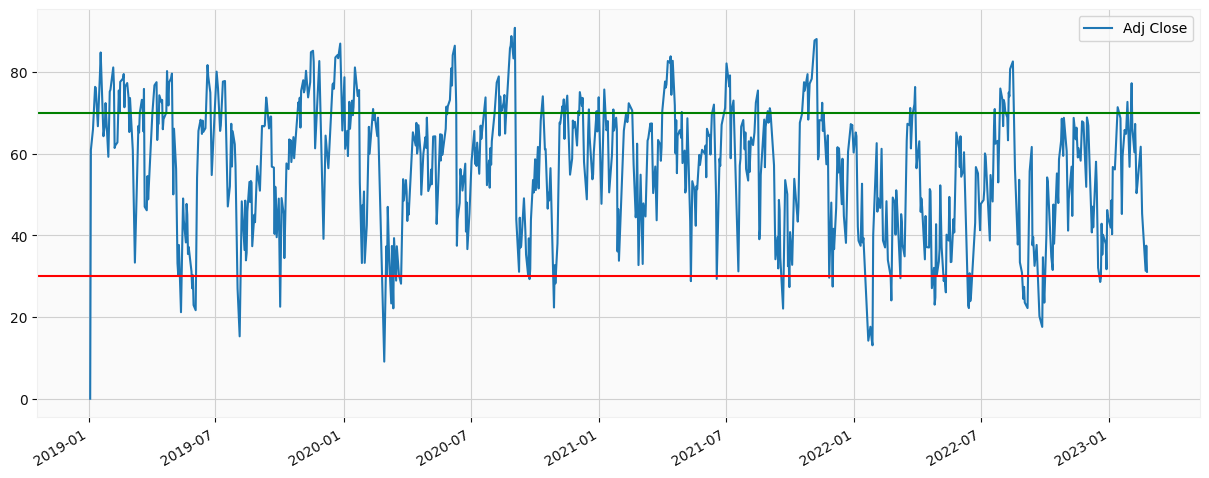

In [19]:
# Partimos de un año de precios.
data_rsi = pd.DataFrame()
data_rsi = pd.concat([data_rsi,data_velas['Adj Close']],axis=1)

#data_rsi = data_rsi.set_index('fecha')

# Obtenemos la diferencia de cada precio con su anterior.
data_rsi = data_rsi.diff()
# El primero no tiene anterior, nos da NaN.
data_rsi = data_rsi[1:]

# Dejamos las diferencias positivas por un lado y las negativas por otro.
pos = data_rsi.copy()
pos[pos < 0] = 0
neg = data_rsi.copy()
neg[neg > 0] = 0

# Calculamos las medias moviles exponenciales.
ewma_pos = pos.ewm(span=14).mean()
ewma_neg = neg.abs().ewm(span=14).mean()

# Calculamos el RSI basado en las EWMA.
RSI = ewma_pos / ewma_neg
RSI = 100.0 - (100.0 / (1.0 + RSI))

# Graficamos el indicador con lineas en los valores 70 y 30.
plt.figure()
RSI.plot(figsize=(15,6))
plt.axhline(y=70, color='green')
plt.axhline(y=30, color='red')
